<a href="https://colab.research.google.com/github/vladleshchuk/Time-Series-Forecasting-of-Rivne-Region-Climate-Characteristics/blob/main/2_Rivne_Perc_Mounths.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving 2_perc.xlsx to 2_perc.xlsx


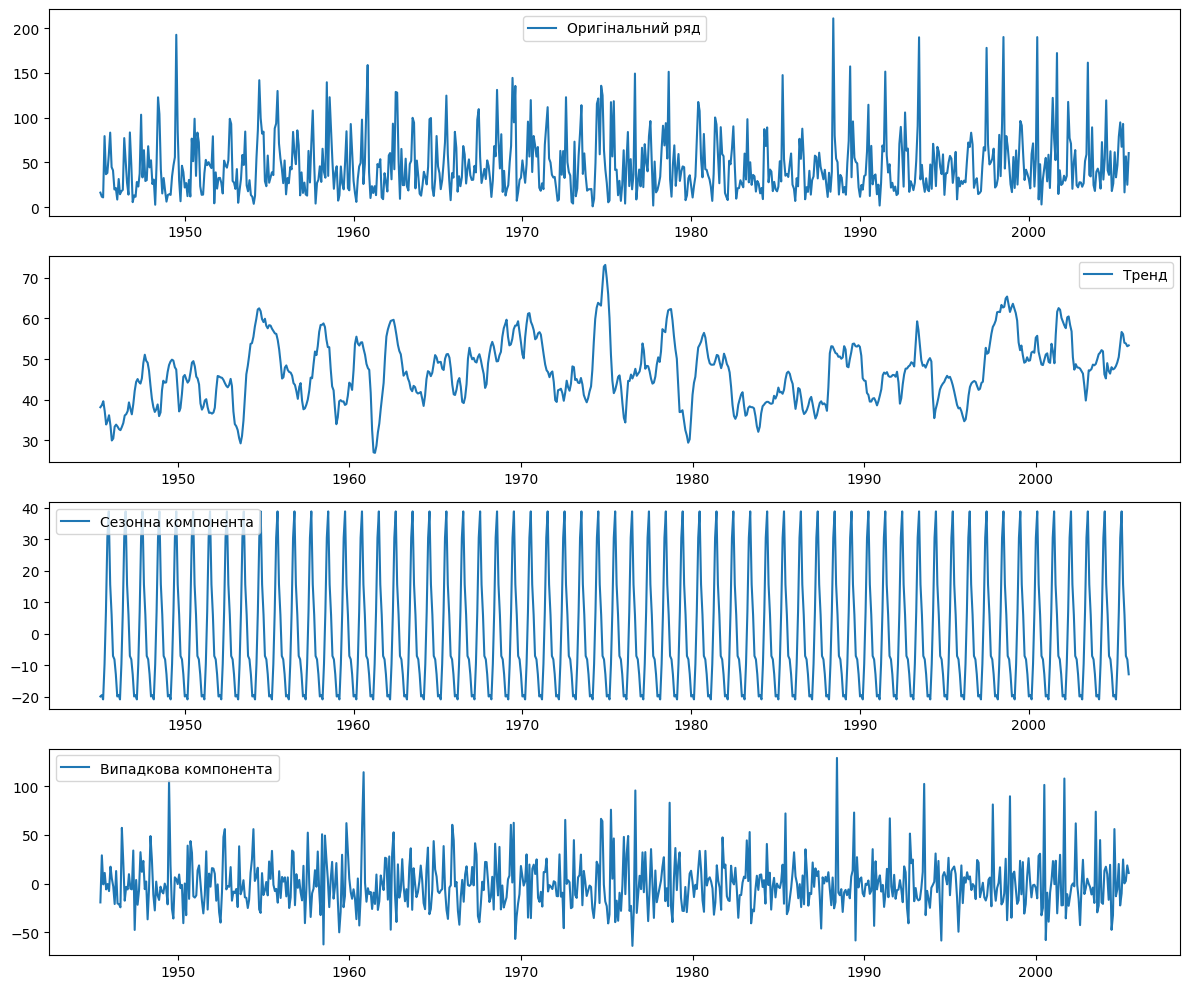

In [ ]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from google.colab import files

# –ó–∞–≤–∞–Ω—Ç–∞–∂–µ–Ω–Ω—è —Ñ–∞–π–ª—É –∑ –æ–ø–∞–¥–∞–º–∏
uploaded = files.upload()
file = "2_perc.xlsx"  # –Ω–æ–≤–∏–π —Ñ–∞–π–ª –∑ –æ–ø–∞–¥–∞–º–∏

# –ó—á–∏—Ç—É–≤–∞–Ω–Ω—è Excel-—Ñ–∞–π–ª—É
df = pd.read_excel(file)

# –ü–µ—Ä–µ—Ç–≤–æ—Ä–µ–Ω–Ω—è —Å—Ç–æ–≤–ø—Ü—è DATE —É datetime (—Ñ–æ—Ä–º–∞—Ç –¥–∞—Ç–∏: –¥–µ–Ω—å.–º—ñ—Å—è—Ü—å.—Ä—ñ–∫)
df['DATE'] = pd.to_datetime(df['DATE'], dayfirst=True)

# –í—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–Ω—è –¥–∞—Ç–∏ —è–∫ —ñ–Ω–¥–µ–∫—Å
df.set_index('DATE', inplace=True)

# –í–∏–±—ñ—Ä —Ä—è–¥—É –æ–ø–∞–¥—ñ–≤ (—è–∫—â–æ –¥–∞–Ω—ñ –≤ —Å—Ç–æ–≤–ø—Ü—ñ "RIVNE")
opady_series = df['RIVNE']

# –î–µ–∫–æ–º–ø–æ–∑–∏—Ü—ñ—è —Ä—è–¥—É –∑ –ø–µ—Ä—ñ–æ–¥–æ–º 12 –º—ñ—Å—è—Ü—ñ–≤
decomposition = seasonal_decompose(opady_series, model='additive', period=12)

# –í—ñ–∑—É–∞–ª—ñ–∑–∞—Ü—ñ—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ñ–≤
plt.figure(figsize=(12, 10))

plt.subplot(411)
plt.plot(opady_series, label='–û—Ä–∏–≥—ñ–Ω–∞–ª—å–Ω–∏–π —Ä—è–¥')
plt.legend()

plt.subplot(412)
plt.plot(decomposition.trend, label='–¢—Ä–µ–Ω–¥')
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal, label='–°–µ–∑–æ–Ω–Ω–∞ –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–∞')
plt.legend()

plt.subplot(414)
plt.plot(decomposition.resid, label='–í–∏–ø–∞–¥–∫–æ–≤–∞ –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–∞')
plt.legend()

plt.tight_layout()
plt.show()


Saving 2_perc.xlsx to 2_perc (1).xlsx


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvyzugipz/uzjptzeq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvyzugipz/g40ahkcq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17990', 'data', 'file=/tmp/tmpvyzugipz/uzjptzeq.json', 'init=/tmp/tmpvyzugipz/g40ahkcq.json', 'output', 'file=/tmp/tmpvyzugipz/prophet_modeljennlro_/prophet_model-20250605172450.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:24:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:24:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/

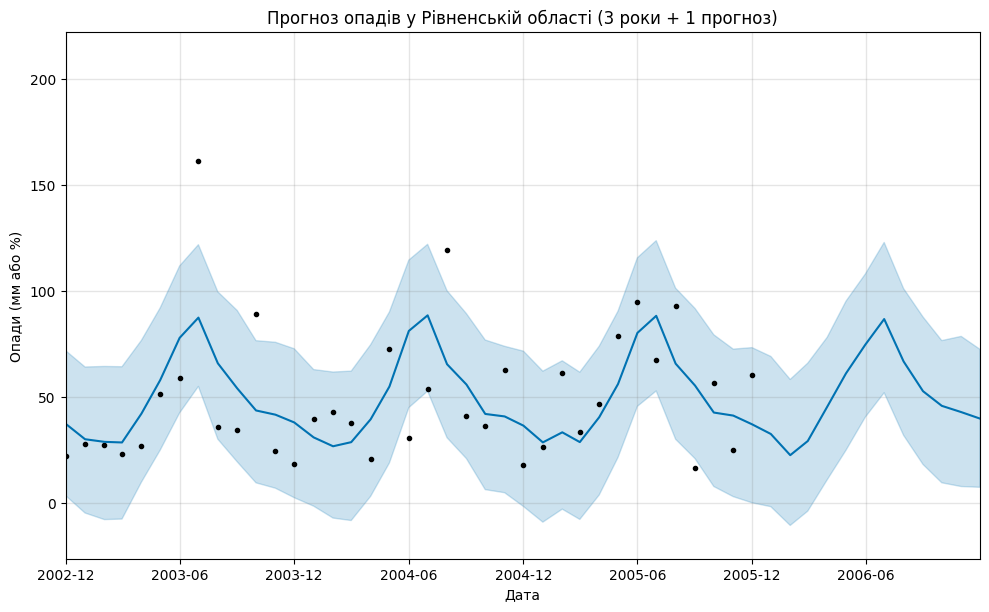

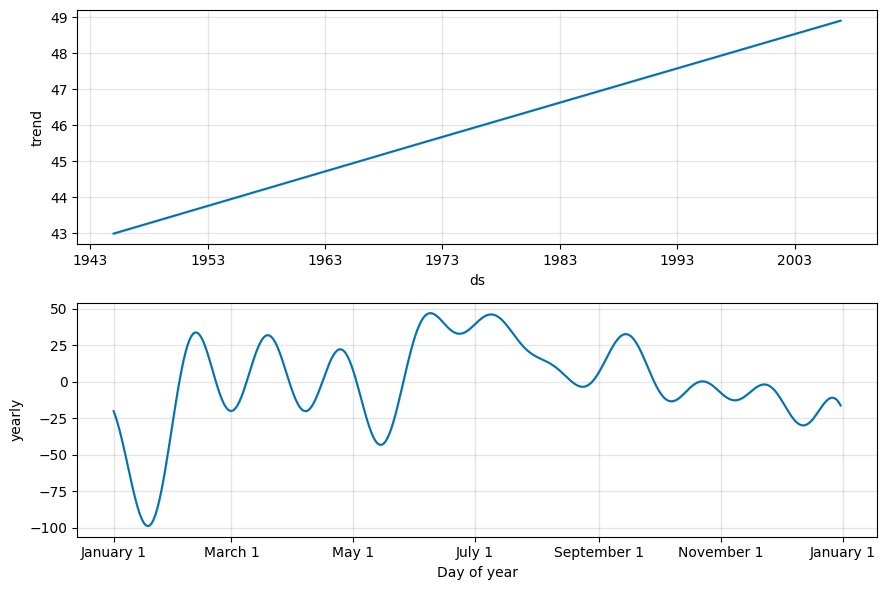

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from google.colab import files

# –ó–∞–≤–∞–Ω—Ç–∞–∂–µ–Ω–Ω—è Excel-—Ñ–∞–π–ª—É –∑ –æ–ø–∞–¥–∞–º–∏
uploaded = files.upload()

# –ó—á–∏—Ç—É–≤–∞–Ω–Ω—è Excel-—Ñ–∞–π–ª—É
file = "2_perc.xlsx"
df = pd.read_excel(file)

# –ü–µ—Ä–µ—Ç–≤–æ—Ä–µ–Ω–Ω—è –¥–∞—Ç–∏
df['DATE'] = pd.to_datetime(df['DATE'], dayfirst=True)

# –ü–µ—Ä–µ–π–º–µ–Ω—É–≤–∞–Ω–Ω—è –∫–æ–ª–æ–Ω–æ–∫ –¥–ª—è Prophet
df_prophet = df.rename(columns={'DATE': 'ds', 'RIVNE': 'y'})

# –°—Ç–≤–æ—Ä–µ–Ω–Ω—è —Ç–∞ –Ω–∞–≤—á–∞–Ω–Ω—è –º–æ–¥–µ–ª—ñ
model = Prophet(yearly_seasonality=True, seasonality_mode='additive')
model.fit(df_prophet)

# –ü—Ä–æ–≥–Ω–æ–∑ –Ω–∞ 1 —Ä—ñ–∫ (12 –º—ñ—Å—è—Ü—ñ–≤)
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

# üìÖ –í—ñ–¥–æ–±—Ä–∞–∂–µ–Ω–Ω—è —Ç—ñ–ª—å–∫–∏ –æ—Å—Ç–∞–Ω–Ω—ñ—Ö 3 —Ä–æ–∫—ñ–≤ + 1 —Ä—ñ–∫ –ø—Ä–æ–≥–Ω–æ–∑—É
last_date = df_prophet['ds'].max()
start_display = last_date - pd.DateOffset(years=3)
end_display = forecast['ds'].max()

# –ü–æ–±—É–¥–æ–≤–∞ –≥—Ä–∞—Ñ—ñ–∫–∞ –ø—Ä–æ–≥–Ω–æ–∑—É –∑ –æ–±–º–µ–∂–µ–Ω–Ω—è–º –ø–æ –æ—Å—ñ X
fig1 = model.plot(forecast)
plt.xlim([start_display, end_display])
plt.title("–ü—Ä–æ–≥–Ω–æ–∑ –æ–ø–∞–¥—ñ–≤ —É –†—ñ–≤–Ω–µ–Ω—Å—å–∫—ñ–π –æ–±–ª–∞—Å—Ç—ñ (3 —Ä–æ–∫–∏ + 1 –ø—Ä–æ–≥–Ω–æ–∑)")
plt.ylabel("–û–ø–∞–¥–∏ (–º–º –∞–±–æ %)")
plt.xlabel("–î–∞—Ç–∞")
plt.grid(True)
plt.show()

# –ö–æ–º–ø–æ–Ω–µ–Ω—Ç–∏ –ø—Ä–æ–≥–Ω–æ–∑—É
fig2 = model.plot_components(forecast)
plt.show()
